In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calculate_option_price(
    start_time = 0,
    end_time = 1,
    n_time_periods = 10000,
    r = 0.05,
    max_up = 1.2,
    max_down = 0.8,
    start_price = 100,
    is_call_option = True,
    option_strike = 100,
    ):
    """Calculate stock and option prices and store in matrices. 
    A move up remains on the same row; a move down goes to the row below.
    Columns represent time. To the right is one period into the future."""
    
    t = (end_time - start_time) / n_time_periods
    rows = cols = n_time_periods + 1
    stock_price = np.ones((rows, cols)) * np.nan
    option_price = np.ones((rows, cols)) * np.nan
    
    u = max_up ** (1/n_time_periods)
    d = max_down ** (1/n_time_periods)

    pv = np.exp(-r * t)  # present value
    fv = np.exp(r * t)   # future value

    for col in range(cols-1, -1, -1):
        rows = np.arange(col + 1)
        times_down = rows
        times_up = col - rows
        stock_price[rows, col] = start_price * u ** times_up * d ** times_down

        if col == (cols - 1):
            if is_call_option:
                option_price[rows, col] = np.amax(stock_price[rows, col].reshape(-1, 1) - option_strike, axis=1, initial=0)
            else:
                option_price[rows, col] = np.amax(option_strike - stock_price[rows, col].reshape(-1, 1), axis=1, initial=0)
        else:
            option_price[rows, col] = pv / (u - d) * (option_price[rows, col+1] * (fv - d) + \
                                                      option_price[rows+1, col+1] * (u - fv))
            
    return option_price[0, 0], stock_price, option_price

In [3]:
def visualize(mat):
    rows, cols = mat.shape
    if cols < 5:
        plt.figure()
        for col in range(cols-1, -1, -1):
            for row in range(col+1):
                label = mat[row, col].round(2)
                x = col
                y = row * -1
                plt.scatter(x, y, color='black')
                plt.text(x+0.1, y, str(label))
        plt.show()
    
    else:
        plt.matshow(option_price)
        plt.title(f'Start price: {str(mat[0, 0].round(2))}')
        plt.colorbar()
        plt.show()

In [4]:
p, stock_price, option_price = calculate_option_price(n_time_periods = 4)

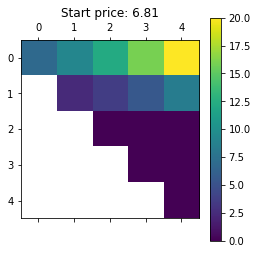

In [5]:
visualize(option_price)

In [6]:
p, stock_price, option_price = calculate_option_price(n_time_periods = 10000)

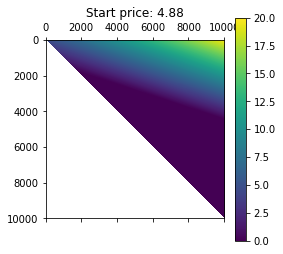

In [7]:
visualize(option_price)